In [39]:
#https://ohke.hateblo.jp/entry/2017/08/11/230000を参考に利用しています。

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
cancer_df = pd.read_csv('../data/cancer.csv')

In [42]:
# print('cancer df shape: {}'.format(original_df.shape))
print('cancer df shape: {}'.format(cancer_df.shape))

cancer df shape: (569, 33)


In [43]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [44]:
cancer_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [45]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)

・diagnosis: 診断結果 (良性がB / 悪性がM)
・説明変数は3列以降、目的変数を2列目としロジスティック回帰で分類

In [46]:
# 目的変数の抽出
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)

In [47]:
# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]

In [48]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


・検証スコア97%で分類できることを確認

In [55]:
X_train_scaled.shape[1]

30

<BarContainer object of 30 artists>

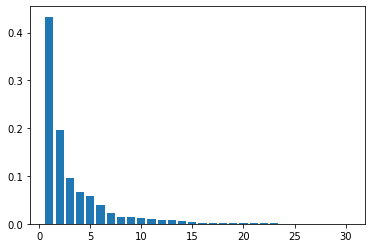

In [56]:
pca = PCA(n_components=X_train_scaled.shape[1])
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

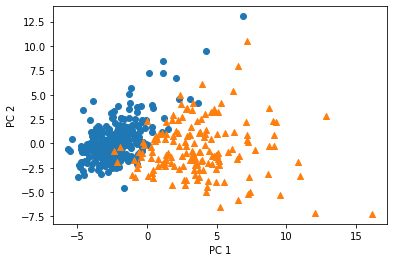

In [57]:
# PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

# 課題

In [60]:
# 次元圧縮後の特徴量でロジスティック回帰
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_pca, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_pca, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_pca, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_pca))))



Train score: 0.965
Test score: 0.916
Confustion matrix:
[[83  7]
 [ 5 48]]


検証スコアが91.6%まで低下

Text(0, 0.5, 'PC 2')

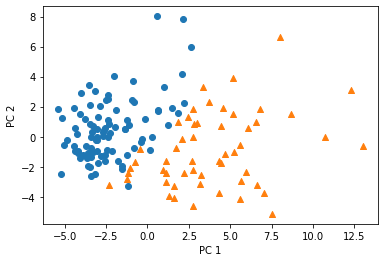

In [64]:
# 検証データを散布図にプロット
temp = pd.DataFrame(X_test_pca)
temp['Outcome'] = y_test.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸